In [36]:
%%bash
wget "https://pjreddie.com/media/files/yolov3.weights"

--2024-06-22 06:24:19--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

     0K .......... .......... .......... .......... ..........  0%  587K 6m52s
    50K .......... .......... .......... .......... ..........  0%  503K 7m27s
   100K .......... .......... .......... .......... ..........  0%  685K 6m56s
   150K .......... .......... .......... .......... ..........  0%  123M 5m12s
   200K .......... .......... .......... .......... ..........  0%  405K 6m9s
   250K .......... .......... .......... .......... ..........  0%  121M 5m8s
   300K .......... .......... .......... .......... ..........  0% 48.4M 4m24s
   350K .......... .......... .......... .......... ..........  0%  693K 4m35s
   400K .......... .......... .........

In [37]:
%%bash
wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

--2024-06-22 06:24:31--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.1’

     0K ........                                              100% 48.9M=0s

2024-06-22 06:24:31 (48.9 MB/s) - ‘yolov3.cfg.1’ saved [8342/8342]



In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [39]:
CONFIDENCE = 0.5
SCORE_THRESHOLD = 0.5
IOU_THRESHOLD = 0.5

In [40]:
# the neural network configuration
config_path = "yolov3.cfg"
weights_path = "yolov3.weights"

# loading all the class labels (objects);
labels = ['',
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter',
    'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
    'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet',
    'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
    'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

#generating colors for each object for later plotting
colors = np.random.randint(0, 255, size=(len(labels), 3) , dtype='uint8')

In [41]:
colors

array([[140,  88,  49],
       [ 84,  61,  17],
       [203, 176, 240],
       [ 41,  39,   3],
       [157,  81,  84],
       [157,  63,  49],
       [183,   3, 237],
       [ 15, 156, 217],
       [219, 126, 154],
       [ 57, 213, 215],
       [109, 235,  52],
       [116, 139, 174],
       [248,  18, 166],
       [142, 128,   9],
       [144,   2, 126],
       [ 65, 213,  66],
       [149, 197, 187],
       [126, 169,  53],
       [208, 228, 188],
       [157, 169,  73],
       [122, 165,  53],
       [ 86,  14,  89],
       [211, 202, 196],
       [134, 243, 165],
       [251,  23, 142],
       [ 56,  50, 181],
       [ 64,  94, 181],
       [148,  38, 118],
       [164,   3, 188],
       [216, 181, 218],
       [ 67, 144, 129],
       [159, 175,  34],
       [167, 177, 214],
       [209, 212,  71],
       [226, 199, 185],
       [ 75, 215, 208],
       [111,  34,  44],
       [ 20, 110, 137],
       [166, 189, 191],
       [ 18,  88,  26],
       [170, 139, 153],
       [176, 145

In [42]:
colors.shape

(82, 3)

In [43]:
# load the YOLO network
net = cv2.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')

In [44]:
type(net)

cv2.dnn.Net

In [45]:
import os
image = cv2.imread("jungle.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
file_name = os.path.basename("jungle.jpg")
filename, ext = file_name.split(".")

(-0.5, 639.5, 475.5, -0.5)

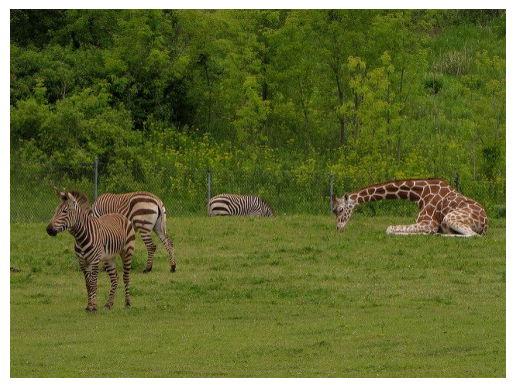

In [46]:
plt.imshow(image)
plt.axis('off')

In [47]:
h, w = image.shape[:2]
# create 4D blob
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416,416), swapRB=True, crop=False)

In [48]:
blob

array([[[[0.04705882, 0.01960784, 0.06666667, ..., 0.1254902 ,
          0.07843138, 0.10980392],
         [0.00392157, 0.05882353, 0.08627451, ..., 0.07058824,
          0.07058824, 0.08235294],
         [0.01176471, 0.05098039, 0.05098039, ..., 0.02352941,
          0.10196079, 0.14901961],
         ...,
         [0.13725491, 0.15294118, 0.15294118, ..., 0.12941177,
          0.16078432, 0.13725491],
         [0.15294118, 0.16470589, 0.17254902, ..., 0.1882353 ,
          0.14901961, 0.15294118],
         [0.2       , 0.20392157, 0.21176471, ..., 0.1764706 ,
          0.17254902, 0.14509805]],

        [[0.16862746, 0.11372549, 0.18431373, ..., 0.3019608 ,
          0.27058825, 0.30980393],
         [0.10196079, 0.16862746, 0.2       , ..., 0.24313726,
          0.2627451 , 0.28627452],
         [0.11372549, 0.16470589, 0.14901961, ..., 0.1882353 ,
          0.29803923, 0.34901962],
         ...,
         [0.42745098, 0.4392157 , 0.44313726, ..., 0.42352942,
          0.46666667, 0.4

In [49]:
ln = net.getLayerNames()
ln

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [50]:
net.getUnconnectedOutLayers()

array([200, 227, 254], dtype=int32)

In [51]:
# sets the blob as the input of the network
net.setInput(blob)
# get all the layer names
ln = net.getLayerNames()
try:
  ln = [ln[i[0]-1] for i in net.getUnconnectedOutLayers()]
except IndexError:
  ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

layer_outputs = net.forward(ln)

In [52]:
layer_outputs

(array([[0.03155247, 0.04028403, 0.28403947, ..., 0.        , 0.        ,
         0.        ],
        [0.04219297, 0.0294946 , 0.23797372, ..., 0.        , 0.        ,
         0.        ],
        [0.03956942, 0.03125083, 0.8829473 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9573964 , 0.95129865, 0.49436393, ..., 0.        , 0.        ,
         0.        ],
        [0.9560443 , 0.9671822 , 0.32762206, ..., 0.        , 0.        ,
         0.        ],
        [0.9637412 , 0.9515038 , 0.78527254, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.02102786, 0.01836234, 0.05919967, ..., 0.        , 0.        ,
         0.        ],
        [0.01356249, 0.01778921, 0.297508  , ..., 0.        , 0.        ,
         0.        ],
        [0.02029595, 0.01704775, 0.08835562, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.96978503, 0.9751966 , 0.04962498, ..., 0.        , 0.        ,
         0.        

In [53]:
boxes, confidences, class_ids = [], [], []
# loop over each of the layer outputs
for output in layer_outputs:
  # loop over each of the object detections
  for detection in output:
    # extract the class ID and confidence (i.e., probability) of
    # the current object detection
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    # discard out weak predictions by ensuring the detected
    # probability is greater than the minimum probability
    if confidence > CONFIDENCE:
      box = detection[0:4] * np.array([w, h, w, h])
      (centerX, centerY, width, height) = box.astype("int")
      # use the center (x, y) - coordinates to derive the top and left corner of the bounding box
      x = int(centerX - (width / 2))
      y = int(centerY - (height / 2))
      # update our list of bounding box coordinates, confidences, and clas IDs.
      boxes.append([x, y, int(width), int(height)])
      confidences.append(float(confidence))
      class_ids.append(class_id)

In [54]:
boxes

[[405, 223, 217, 59],
 [55, 231, 159, 114],
 [87, 236, 136, 104],
 [414, 224, 208, 66],
 [47, 237, 147, 137],
 [76, 235, 154, 121],
 [247, 237, 93, 31],
 [250, 236, 95, 34],
 [249, 240, 97, 34],
 [103, 233, 109, 110],
 [46, 231, 123, 153],
 [102, 237, 108, 119],
 [42, 241, 107, 149],
 [48, 243, 115, 145],
 [255, 237, 85, 32]]

In [55]:
confidences

[0.6346844434738159,
 0.9911091923713684,
 0.8938906192779541,
 0.6215727925300598,
 0.9985881447792053,
 0.5608307123184204,
 0.7890708446502686,
 0.995597779750824,
 0.8802229762077332,
 0.8385530114173889,
 0.9966028928756714,
 0.5241893529891968,
 0.680671751499176,
 0.9988306760787964,
 0.700495183467865]

In [56]:
class_ids

[23, 22, 22, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]

In [57]:
labels[22], labels[23], labels[24], labels[25]

('elephant', 'bear', 'zebra', 'giraffe')

In [64]:
# loop over the indexes we are keeping
for i in range(len(boxes)):
  # extracting the bounding box coordinates
  x, y = boxes[i][0], boxes[i][1]
  w, h = boxes[i][2], boxes[i][3]
  # draw a bounding box rectangle and label on the image
  color = [int(c) for c in colors[class_ids[i]]]
  cv2.rectangle(image, (x, y), (x + w, y + h), color, thickness=1)
  # calculate text_width & height to draw the transpatent boxes as background of the text
  text = f'{(labels[class_ids[i]])} {confidences[i]:.2f}'
  (text_width, text_height) = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.4, thickness=1)[0]
  text_offset_x = x
  text_offset_y = y - 5
  box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height))
  overlay = image.copy()
  cv2.rectangle(overlay, box_coords[0], box_coords[1], color, cv2.FILLED)
  # add opacity (transparency to he box)
  image = cv2.addWeighted(overlay, 0.6, image, 0.4, 0)
  # now put the text(label: confidence %)
  cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.4, color=(0, 0, 0), thickness=1)

(-0.5, 639.5, 475.5, -0.5)

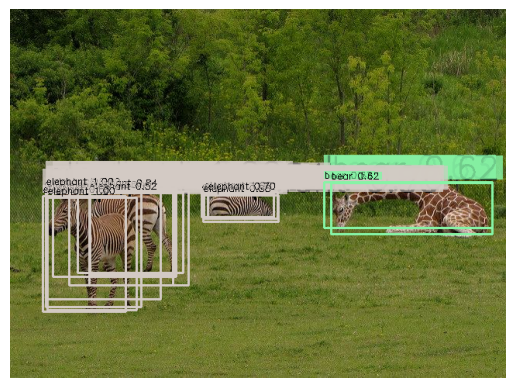

In [65]:
plt.imshow(image)
plt.axis('off')